In [33]:
from datasets import list_datasets
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import AutoModel
import matplotlib.pyplot as plt

import pandas as pd
import torch
import numpy as np

In [16]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tokenizer.vocab_size

c:\Users\csang\miniconda3\envs\NLPBASICS\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\csang\miniconda3\envs\NLPBASICS\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\csang\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pyt

30522

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

c:\Users\csang\miniconda3\envs\NLPBASICS\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\csang\miniconda3\envs\NLPBASICS\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### Erster Blick in die Daten

In [17]:
all_datasets = list_datasets()
print(f"Derzeit sind {len(all_datasets)} Datensätze auf dem Hugging Face Hub verfügbar")
print(f"Die ersten 10 Datensätze sind: {all_datasets[:10]}")

Derzeit sind 140913 Datensätze auf dem Hugging Face Hub verfügbar
Die ersten 10 Datensätze sind: ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [18]:
emotions = load_dataset("emotion")
emotions

c:\Users\csang\miniconda3\envs\NLPBASICS\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [19]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [20]:
len(train_ds)
print(f"Der Datensatz enthält {len(train_ds)} Beispiele")
print(f"Das erste Beispiel ist: {train_ds[0]}")
print(f"Colums: {train_ds.column_names}")
print(f"Features: {train_ds.features}")

Der Datensatz enthält 16000 Beispiele
Das erste Beispiel ist: {'text': 'i didnt feel humiliated', 'label': 0}
Colums: ['text', 'label']
Features: {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [21]:
print(f"Die ersten 5 Beispiele sind: {train_ds[:5]}")
print(f"Die ersten 5 Labels sind: {train_ds['label'][:5]}")
print(f"Die ersten 5 Texte sind: {train_ds['text'][:5]}")

Die ersten 5 Beispiele sind: {'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
Die ersten 5 Labels sind: [0, 0, 3, 2, 3]
Die ersten 5 Texte sind: ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


### Dataset-Objekte in DataFrames überführen

In [22]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [23]:
def label_to_string(label):
    return emotions["train"].features["label"].int2str(label)

df["label_name"] = df["label"].apply(label_to_string)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Blick in die Verteilung der Kateogrien

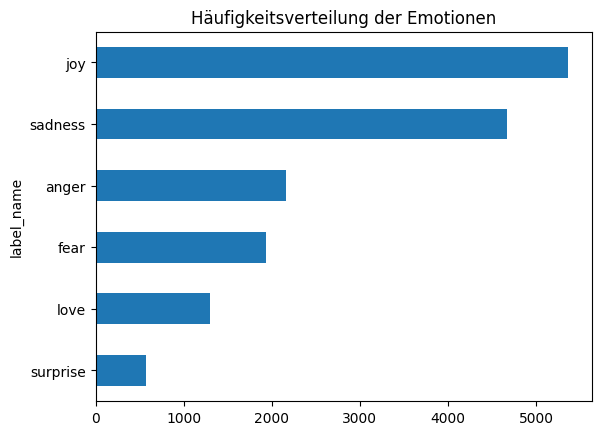

In [24]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Häufigkeitsverteilung der Emotionen")
plt.show()

### Wie lange sind unsere Tweets?

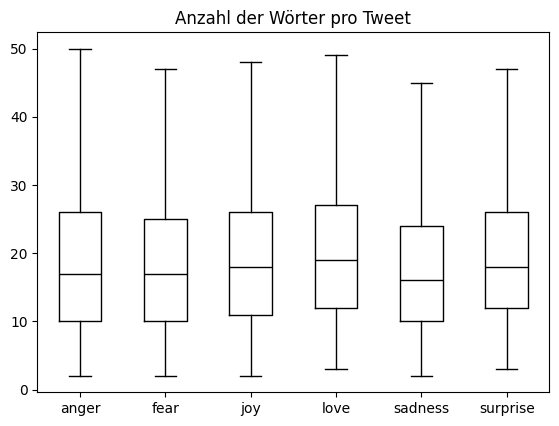

In [25]:
df["Anzahl der Wörter pro Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Anzahl der Wörter pro Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [26]:
emotions.reset_format()

### Den gesamten Datensatz tokenisieren

In [27]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

print(tokenize(emotions["train"][:2]))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [28]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map: 100%|██████████| 2000/2000 [00:00<00:00, 29539.74 examples/s]


In [31]:
print(emotions_encoded["train"][:1])
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Die letzten verborgenen Zustände extrahieren

In [35]:
def extract_hidden_states(batch):
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_states = model(**inputs).last_hidden_state
    return {"hidden_states": last_hidden_states[:, 0].cpu().numpy()}

In [36]:
emotions_encoded.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True, batch_size=16)

Map: 100%|██████████| 2000/2000 [00:40<00:00, 49.30 examples/s]


In [39]:
emotions_hidden["train"][:1]
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_states']

### Feature Matrix erstellen

In [ ]:
X_train = emotions_hidden["train"]["hidden_states"]
X_valid = emotions_hidden["validation"]["hidden_states"]
y_train = emotions_hidden["train"]["label"]
y_valid = emotions_hidden["validation"]["label"]

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape